In [2]:
import pandas as pd #引入Pandas模組 as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
# 指定默認字形：解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("college.csv", thousands=",")    #匯入csv檔，將千分位記號捨去
data.head()

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,日間學制學士班學雜費收費基準-醫學系,日間學制學士班學雜費收費基準-牙醫學系,日間學制學士班學雜費收費基準-醫學院,日間學制學士班學雜費收費基準-工學院,日間學制學士班學雜費收費基準-理農學院,日間學制學士班學雜費收費基準-商學院,日間學制學士班學雜費收費基準-文法學院,日間學制學士班學雜費收費基準-其他,日間學制副學士學雜費收費基準(五專後2年、二專)-工業類,日間學制副學士學雜費收費基準(五專後2年、二專)-商管類,日間學制副學士學雜費收費基準(五專後2年、二專)-醫護類,日間學制副學士學雜費收費基準(五專後2年、二專)-其他
0,106,公立,一般大學,1,國立政治大學,0,0,0,0,28430,24890,24510,0,0,0,0,0
1,106,公立,一般大學,2,國立清華大學,0,0,0,28630,28630,24370,24370,0,0,0,0,0
2,106,公立,一般大學,3,國立臺灣大學,39560,36170,31050,29470,30260,25610,25230,0,0,0,0,0
3,106,公立,一般大學,4,國立臺灣師範大學,0,0,0,27600,27380,0,23590,0,0,0,0,0
4,106,公立,一般大學,5,國立成功大學,39550,0,31040,29490,29250,25600,25210,0,0,0,0,0


In [4]:
rename_dic = {"日間學制副學士學雜費收費基準(五專後2年、二專)-工業類": "五專工業", "日間學制副學士學雜費收費基準(五專後2年、二專)-商管類": "五專商管", 
              "日間學制副學士學雜費收費基準(五專後2年、二專)-醫護類": "五專醫護"}
ChangeWordData = data.rename(rename_dic, axis=1)                          #將五專欄位名字改成縮寫，方便操作
ChangeWordData.head()

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,日間學制學士班學雜費收費基準-醫學系,日間學制學士班學雜費收費基準-牙醫學系,日間學制學士班學雜費收費基準-醫學院,日間學制學士班學雜費收費基準-工學院,日間學制學士班學雜費收費基準-理農學院,日間學制學士班學雜費收費基準-商學院,日間學制學士班學雜費收費基準-文法學院,日間學制學士班學雜費收費基準-其他,五專工業,五專商管,五專醫護,日間學制副學士學雜費收費基準(五專後2年、二專)-其他
0,106,公立,一般大學,1,國立政治大學,0,0,0,0,28430,24890,24510,0,0,0,0,0
1,106,公立,一般大學,2,國立清華大學,0,0,0,28630,28630,24370,24370,0,0,0,0,0
2,106,公立,一般大學,3,國立臺灣大學,39560,36170,31050,29470,30260,25610,25230,0,0,0,0,0
3,106,公立,一般大學,4,國立臺灣師範大學,0,0,0,27600,27380,0,23590,0,0,0,0,0
4,106,公立,一般大學,5,國立成功大學,39550,0,31040,29490,29250,25600,25210,0,0,0,0,0


In [5]:
newdata = ChangeWordData.drop(columns=["五專工業", "五專商管", "五專醫護", "日間學制副學士學雜費收費基準(五專後2年、二專)-其他"])  #刪除用不到的欄位
newdata.head()                                   

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,日間學制學士班學雜費收費基準-醫學系,日間學制學士班學雜費收費基準-牙醫學系,日間學制學士班學雜費收費基準-醫學院,日間學制學士班學雜費收費基準-工學院,日間學制學士班學雜費收費基準-理農學院,日間學制學士班學雜費收費基準-商學院,日間學制學士班學雜費收費基準-文法學院,日間學制學士班學雜費收費基準-其他
0,106,公立,一般大學,1,國立政治大學,0,0,0,0,28430,24890,24510,0
1,106,公立,一般大學,2,國立清華大學,0,0,0,28630,28630,24370,24370,0
2,106,公立,一般大學,3,國立臺灣大學,39560,36170,31050,29470,30260,25610,25230,0
3,106,公立,一般大學,4,國立臺灣師範大學,0,0,0,27600,27380,0,23590,0
4,106,公立,一般大學,5,國立成功大學,39550,0,31040,29490,29250,25600,25210,0


In [6]:
Finaldata = newdata.drop(columns=["日間學制學士班學雜費收費基準-醫學系", "日間學制學士班學雜費收費基準-牙醫學系", "日間學制學士班學雜費收費基準-醫學院"])
Finaldata.head()         #因為中原沒有醫學院，故刪除醫學相關系所欄位


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,日間學制學士班學雜費收費基準-工學院,日間學制學士班學雜費收費基準-理農學院,日間學制學士班學雜費收費基準-商學院,日間學制學士班學雜費收費基準-文法學院,日間學制學士班學雜費收費基準-其他
0,106,公立,一般大學,1,國立政治大學,0,28430,24890,24510,0
1,106,公立,一般大學,2,國立清華大學,28630,28630,24370,24370,0
2,106,公立,一般大學,3,國立臺灣大學,29470,30260,25610,25230,0
3,106,公立,一般大學,4,國立臺灣師範大學,27600,27380,0,23590,0
4,106,公立,一般大學,5,國立成功大學,29490,29250,25600,25210,0


In [7]:
Finaldata.rename(columns={'日間學制學士班學雜費收費基準-工學院':'工學院', '日間學制學士班學雜費收費基準-理農學院':'理學院', '日間學制學士班學雜費收費基準-商學院':'商學院','日間學制學士班學雜費收費基準-文法學院':'文學與法學院'}, inplace=True)
Finaldata = Finaldata.drop(columns=["日間學制學士班學雜費收費基準-其他"])     #欄位改名，方便辨認以及後面操作
Finaldata.head()

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
0,106,公立,一般大學,1,國立政治大學,0,28430,24890,24510
1,106,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
2,106,公立,一般大學,3,國立臺灣大學,29470,30260,25610,25230
3,106,公立,一般大學,4,國立臺灣師範大學,27600,27380,0,23590
4,106,公立,一般大學,5,國立成功大學,29490,29250,25600,25210


In [8]:
IsitNation = (Finaldata['設立別'] == '公立')      #國立一般大學
TypeofSchool = (Finaldata['學校類別'] == '一般大學')
Nationdata = Finaldata[IsitNation & TypeofSchool]
Nationdata.head()

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
0,106,公立,一般大學,1,國立政治大學,0,28430,24890,24510
1,106,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
2,106,公立,一般大學,3,國立臺灣大學,29470,30260,25610,25230
3,106,公立,一般大學,4,國立臺灣師範大學,27600,27380,0,23590
4,106,公立,一般大學,5,國立成功大學,29490,29250,25600,25210


In [9]:
IsitNation = (Finaldata['設立別'] == '私立')      #私立一般大學
TypeofSchool = (Finaldata['學校類別'] == '一般大學')
normaldata = Finaldata[IsitNation & TypeofSchool]
normaldata.head()

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
49,106,私立,一般大學,1001,東海大學,56289,55820,48951,50510
50,106,私立,一般大學,1002,輔仁大學,55350,54890,48140,47430
51,106,私立,一般大學,1003,東吳大學,56460,55990,49110,48370
52,106,私立,一般大學,1004,中原大學,54870,54360,46060,46060
53,106,私立,一般大學,1005,淡江大學學校財團法人淡江大學,54720,54260,47590,46880


In [10]:
Tuition1100 = Nationdata[Finaldata.學年度 == 110]                     # 110年國立大學學費
Tuition1100.head()

c:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
623,110,公立,一般大學,1,國立政治大學,0,28430,24890,24510
624,110,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
625,110,公立,一般大學,3,國立臺灣大學,29470,30260,25610,25230
626,110,公立,一般大學,4,國立臺灣師範大學,27600,27380,0,23590
627,110,公立,一般大學,5,國立成功大學,29490,29250,25600,25210


In [11]:
Tuition1101 = normaldata[Finaldata.學年度 == 110]                     # 110年私立大學學費
Tuition1101.head()

c:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
669,110,私立,一般大學,1001,東海大學,56289,55820,48951,50510
670,110,私立,一般大學,1002,輔仁大學,55350,54890,48140,47430
671,110,私立,一般大學,1003,東吳大學,56460,55990,49110,48370
672,110,私立,一般大學,1004,中原大學,54870,54360,46060,46060
673,110,私立,一般大學,1005,淡江大學學校財團法人淡江大學,54720,54260,47590,46880


In [12]:
Sortdata0 = Tuition1100.工學院.sort_values(ascending=False).head(100)            # 110國立工學院學費排序
Sortdata0.head(23)

627    29490
625    29470
629    28990
631    28940
630    28660
624    28630
633    28100
628    27877
632    27810
639    27790
626    27600
634    27590
635    27570
638    26720
645    26620
636    26540
648    26302
646    26230
640    26185
649    26000
664    25394
660    25390
637    24650
Name: 工學院, dtype: int64

In [13]:
a = Finaldata.iloc[627]    # 110國立工學院最貴
b = Finaldata.iloc[637]    # 110國立工學院最便宜
print(a)
print(b)

學年度           110
設立別            公立
學校類別         一般大學
學校統計處代碼         5
學校名稱       國立成功大學
工學院         29490
理學院         29250
商學院         25600
文學與法學院      25210
Name: 627, dtype: object
學年度           110
設立別            公立
學校類別         一般大學
學校統計處代碼        18
學校名稱       國立嘉義大學
工學院         24650
理學院         24440
商學院         21390
文學與法學院      21070
Name: 637, dtype: object


In [14]:
Sortdata1 = Tuition1101.工學院.sort_values(ascending=False).head(100)   # 110私立工學院學費排序
Sortdata1.head(25)           

683    56914
671    56460
669    56289
678    56040
682    55373
670    55350
716    54980
675    54970
672    54870
673    54720
695    54230
690    54170
674    53390
684    53383
745    53234
726    52780
680    52748
701    52740
681    52380
679    51880
688    51597
707    50978
685    49795
718    48720
734    47038
Name: 工學院, dtype: int64

In [15]:
a = Finaldata.iloc[683]    # 110私立工學院最貴
b = Finaldata.iloc[677]    # 110私立工學院最便宜
print(a)
print(b)

學年度          110
設立別           私立
學校類別        一般大學
學校統計處代碼     1015
學校名稱        世新大學
工學院        56914
理學院            0
商學院        49252
文學與法學院     48283
Name: 683, dtype: object
學年度          110
設立別           私立
學校類別        一般大學
學校統計處代碼     1009
學校名稱        長庚大學
工學院        44307
理學院            0
商學院        38528
文學與法學院         0
Name: 677, dtype: object


In [16]:
Sortdata0 = Tuition1100.商學院.sort_values(ascending=False).head(100)            # 110國立商學院學費排序
Sortdata0.head(50)

629    28740
625    25610
627    25600
631    25130
623    24890
630    24870
633    24400
624    24370
628    24215
632    24140
639    24100
773    24000
654    23950
635    23950
638    23320
648    22827
664    22794
652    22790
640    22741
649    22600
636    22510
660    22042
637    21390
626        0
645        0
646        0
647        0
651        0
653        0
657        0
661        0
634        0
Name: 商學院, dtype: int64

In [17]:
a = Finaldata.iloc[629]    # 110國立商學院最貴
b = Finaldata.iloc[637]    # 110國立商學院最便宜
print(a)
print(b)

學年度             110
設立別              公立
學校類別           一般大學
學校統計處代碼           7
學校名稱       國立陽明交通大學
工學院           28990
理學院           28740
商學院           28740
文學與法學院        24770
Name: 629, dtype: object
學年度           110
設立別            公立
學校類別         一般大學
學校統計處代碼        18
學校名稱       國立嘉義大學
工學院         24650
理學院         24440
商學院         21390
文學與法學院      21070
Name: 637, dtype: object


In [18]:
Sortdata1 = Tuition1101.商學院.sort_values(ascending=False).head(100)   # 110私立商學院學費排序
Sortdata1.head(30)           

707    50978
683    49252
671    49110
669    48951
678    48910
670    48140
682    47994
675    47820
716    47800
695    47800
673    47590
690    47120
688    46597
674    46425
717    46243
701    46210
684    46201
672    46060
745    45991
680    45870
726    45740
689    45560
676    45496
679    45121
734    44010
685    43315
751    42896
718    42700
677    38528
759        0
Name: 商學院, dtype: int64

In [19]:
a = Finaldata.iloc[707]    # 110私立商學院最貴
b = Finaldata.iloc[677]    # 110私立商學院最便宜
print(a)
print(b)

學年度          110
設立別           私立
學校類別        一般大學
學校統計處代碼     1039
學校名稱        玄奘大學
工學院        50978
理學院            0
商學院        50978
文學與法學院     45568
Name: 707, dtype: object
學年度          110
設立別           私立
學校類別        一般大學
學校統計處代碼     1009
學校名稱        長庚大學
工學院        44307
理學院            0
商學院        38528
文學與法學院         0
Name: 677, dtype: object


In [20]:
Tuition1100 = Tuition1100[(Tuition1100.工學院 >= 15) & (Tuition1100.理學院 >= 15) & (Tuition1100.商學院 >= 15) & (Tuition1100.文學與法學院 >= 15)]
Tuition1100.describe()                                   # 110國立大學學費平均

,學年度,工學院,理學院,商學院,文學與法學院
count,14.0,14.000000,14.000000,14.000000,14.000000
mean,110.0,27863.642857,27738.000000,24473.500000,23884.142857
std,0.0,1434.714102,1527.982279,1655.267338,1189.293381
min,110.0,24650.000000,24440.000000,21390.000000,21070.000000
25%,110.0,27625.000000,27397.500000,23987.500000,23627.500000
50%,110.0,27988.500000,27766.000000,24292.500000,24080.000000
75%,110.0,28870.000000,28690.000000,25065.000000,24675.000000
max,110.0,29490.000000,30260.000000,28740.000000,25230.000000


In [21]:
Tuition1101 = Tuition1101[(Tuition1101.工學院 >= 15) & (Tuition1101.理學院 >= 15) & (Tuition1101.商學院 >= 15) & (Tuition1101.文學與法學院 >= 15)]
Tuition1101.describe()                                   # 110私立大學學費平均

,學年度,工學院,理學院,商學院,文學與法學院
count,12.0,12.000000,12.00000,12.000000,12.000000
mean,110.0,54052.250000,53846.00000,46871.333333,46475.583333
std,0.0,1973.142723,1852.89042,1702.174189,2025.904622
min,110.0,49795.000000,49380.00000,43315.000000,42675.000000
25%,110.0,52770.000000,52907.50000,45980.000000,45652.500000
50%,110.0,54795.000000,54310.00000,47007.500000,46135.000000
75%,110.0,55355.750000,54875.00000,48030.500000,47635.000000
max,110.0,56460.000000,55990.00000,49110.000000,50510.000000


In [22]:
myschool = (Finaldata['學校名稱'] == '中原大學' )   #查詢中原學費
Finaldata[myschool]


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
52,106,私立,一般大學,1004,中原大學,54870,54360,46060,46060
209,107,私立,一般大學,1004,中原大學,54870,54360,46060,46060
365,108,私立,一般大學,1004,中原大學,54870,54360,46060,46060
519,109,私立,一般大學,1004,中原大學,54870,54360,46060,46060
672,110,私立,一般大學,1004,中原大學,54870,54360,46060,46060


In [23]:
myschool0 = (Finaldata['學校名稱'] == '國立清華大學' )   #輸入想查詢學校的名字，想查詢清華大學學費
Finaldata[myschool0]


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院,理學院,商學院,文學與法學院
1,106,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
160,107,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
316,108,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
470,109,公立,一般大學,2,國立清華大學,28630,28630,24370,24370
624,110,公立,一般大學,2,國立清華大學,28630,28630,24370,24370


In [ ]:
isbad = (Finaldata['設立別'] == '私立' )   #輸入想查詢學校的名字，想查詢清華大學學費
haha = Finaldata[isbad]
haha

In [ ]:
list_of_engineer_column = haha['工學院'].tolist()
list_of_commercial_column = haha['商學院'].tolist()
list_of_engineer_column


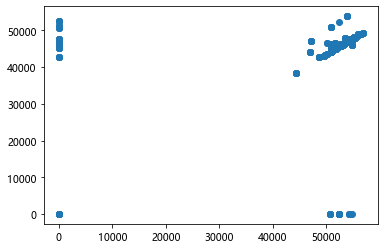

In [37]:
plt.scatter(list_of_engineer_column, list_of_commercial_column)
plt.show()

In [38]:
twodata = list(zip(list_of_engineer_column, list_of_commercial_column))
twodata

[(56289, 48951),
 (55350, 48140),
 (56460, 49110),
 (54870, 46060),
 (54720, 47590),
 (53390, 46425),
 (54970, 47820),
 (0, 45496),
 (44307, 38528),
 (56040, 48910),
 (51880, 45121),
 (52748, 45870),
 (52380, 0),
 (55373, 47994),
 (56914, 49252),
 (53383, 46201),
 (49795, 43315),
 (55684, 48409),
 (0, 0),
 (51597, 46597),
 (0, 45560),
 (54170, 47120),
 (55270, 48135),
 (52206, 45437),
 (0, 0),
 (53390, 46433),
 (54230, 0),
 (0, 0),
 (0, 0),
 (51308, 44630),
 (53870, 53870),
 (51210, 44617),
 (52740, 46210),
 (52369, 52369),
 (0, 0),
 (54124, 47165),
 (54735, 0),
 (53390, 46432),
 (50978, 50978),
 (54220, 47256),
 (50760, 0),
 (50853, 44221),
 (53453, 48028),
 (53938, 46915),
 (52542, 45782),
 (51658, 45025),
 (51640, 45020),
 (54980, 47800),
 (0, 46243),
 (48720, 42700),
 (53390, 46430),
 (51450, 44820),
 (51440, 44820),
 (49628, 43160),
 (0, 45434),
 (51343, 44710),
 (0, 45320),
 (52780, 45740),
 (53202, 46370),
 (51743, 45055),
 (51653, 45020),
 (51643, 45020),
 (51582, 45478),
 (541

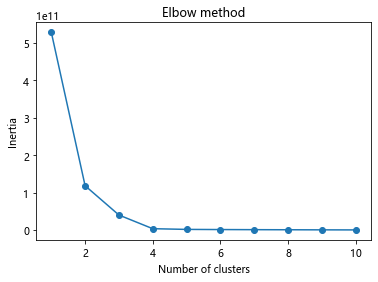

In [39]:
inertias = []

for i in range(1,11):           
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(twodata)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

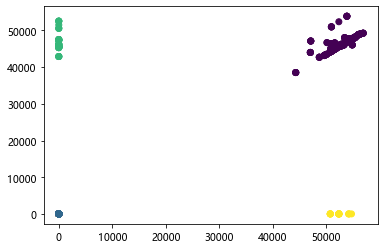

In [43]:
kmeans = KMeans(n_clusters=4)                              # K-means分群              左上:私立大學商學院，沒有工學院    # 中間: 國立大學
kmeans.fit(twodata)                                                                    # 左中:國立大學商學院，沒有工學院    # 右上: 私立大學
                                                                                    # 0 : 沒有工學院也沒商學院
plt.scatter(list_of_engineer_column, list_of_commercial_column, c=kmeans.labels_)   # 中間下面: 國立大學工學院，沒有商學院
plt.show()                                                                          # 右下: 私立大學工學院，沒有商學院

In [30]:
Tuition11000 = Finaldata[Finaldata.學年度 == 110]
newnewdata = Tuition11000.drop(columns=["理學院", "文學與法學院","商學院"])
newnewdata

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,工學院
623,110,公立,一般大學,1,國立政治大學,0
624,110,公立,一般大學,2,國立清華大學,28630
625,110,公立,一般大學,3,國立臺灣大學,29470
626,110,公立,一般大學,4,國立臺灣師範大學,27600
627,110,公立,一般大學,5,國立成功大學,29490
628,110,公立,一般大學,6,國立中興大學,27877
629,110,公立,一般大學,7,國立陽明交通大學,28990
630,110,公立,一般大學,8,國立中央大學,28660
631,110,公立,一般大學,9,國立中山大學,28940
632,110,公立,一般大學,12,國立臺灣海洋大學,27810


In [31]:
sentence = [] 
i = 623   # 學校編號
j = 0     # index

while i <= 773 :
    sentence.insert( j, Finaldata.iloc[i].學校名稱 )    #想將x軸每項名稱改成中文，但沒有成功
    i = i + 1
    j = j + 1
    
sentence
 

['國立政治大學',
 '國立清華大學',
 '國立臺灣大學',
 '國立臺灣師範大學',
 '國立成功大學',
 '國立中興大學',
 '國立陽明交通大學',
 '國立中央大學',
 '國立中山大學',
 '國立臺灣海洋大學',
 '國立中正大學',
 '國立高雄師範大學',
 '國立彰化師範大學',
 '國立臺北大學',
 '國立嘉義大學',
 '國立高雄大學',
 '國立東華大學',
 '國立暨南國際大學',
 '國立臺灣科技大學',
 '國立雲林科技大學',
 '國立屏東科技大學',
 '國立臺北科技大學',
 '國立臺北藝術大學',
 '國立臺灣藝術大學',
 '國立臺東大學',
 '國立宜蘭大學',
 '國立聯合大學',
 '國立虎尾科技大學',
 '國立臺南藝術大學',
 '國立臺南大學',
 '國立臺北教育大學',
 '國立臺中教育大學',
 '國立澎湖科技大學',
 '國立勤益科技大學',
 '國立體育大學',
 '國立臺北護理健康大學',
 '國立高雄餐旅大學',
 '國立金門大學',
 '國立臺灣體育運動大學',
 '國立臺中科技大學',
 '國立臺北商業大學',
 '國立屏東大學',
 '國立高雄科技大學',
 '國立臺灣戲曲學院',
 '國立臺南護理專科學校',
 '國立臺東專科學校',
 '東海大學',
 '輔仁大學',
 '東吳大學',
 '中原大學',
 '淡江大學學校財團法人淡江大學',
 '中國文化大學',
 '逢甲大學',
 '靜宜大學',
 '長庚大學',
 '元智大學',
 '中華大學學校財團法人中華大學',
 '大葉大學',
 '華梵大學',
 '義守大學',
 '世新大學',
 '銘傳大學',
 '實踐大學',
 '朝陽科技大學',
 '高雄醫學大學',
 '南華大學',
 '真理大學',
 '大同大學',
 '南臺學校財團法人南臺科技大學',
 '崑山科技大學',
 '嘉藥學校財團法人嘉南藥理大學',
 '樹德科技大學',
 '慈濟學校財團法人慈濟大學',
 '臺北醫學大學',
 '中山醫學大學',
 '龍華科技大學',
 '輔英科技大學',
 '明新學校財團法人明新科技大學',
 '長榮大學',
 '弘光科技大學',
 '中國醫藥大學',
 '健行學校財團法人健行科技大學',
 '正修學校財團法人正修科技大學',
 

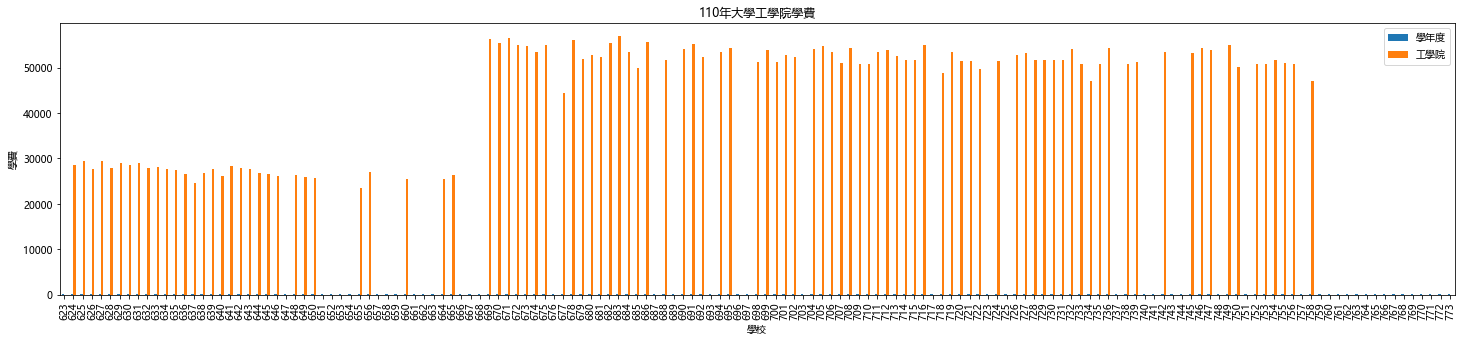

In [32]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']                 #利用x軸數字index去尋找學校名稱
mpl.rcParams['axes.unicode_minus'] = False

chart = newnewdata.plot(kind='bar',  #圖表類型
		    title='110年大學工學院學費',  #圖表標題
                    xlabel='學校',  #x軸說明文字
                    ylabel='學費',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(25, 5), # 圖表大小
                    tick_label=sentence)
                      


In [33]:
file_name = 'datamimi.xlsx'
Final =  newnewdata
# saving the excelsheet
Final.to_excel(file_name)
